In [46]:
import torch
import matplotlib.pyplot as plt

In [47]:
from qubit_sim.noise_gen_classes import OneOnFNoiseWithBumpNoiseGenerator

from data_gen.data_gen_sim_constants import (
    TOTAL_TIME,
    NUM_TIME_STEPS,
)

In [48]:
plt.rc("font", family="serif", serif="cm10")
plt.rc("text", usetex=True)
font_size = 27
plt.rcParams.update({"font.size": font_size})

In [49]:
dpi_level = 750

In [50]:
frequencies = torch.fft.fftfreq(
    n=NUM_TIME_STEPS,
    d=TOTAL_TIME / NUM_TIME_STEPS,
)

In [51]:
one_on_f_noise_gen = OneOnFNoiseWithBumpNoiseGenerator(
    total_num_examples=1,
    mu=100.0,
    sigma=5,
    height=0.5,
    threshold_freq=1000.0,
)

In [52]:
spectral_density = one_on_f_noise_gen.sqrt_scaled_spectral_density

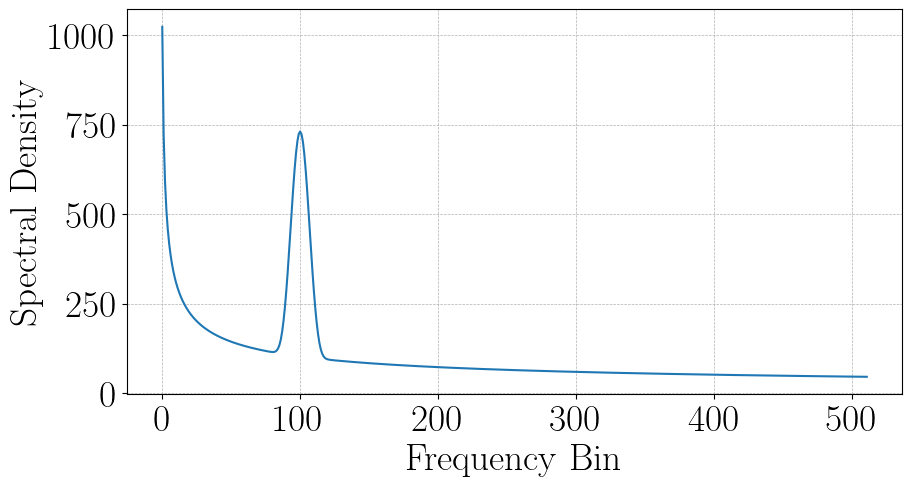

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(frequencies[: NUM_TIME_STEPS // 2], spectral_density)
plt.xlabel("Frequency Bin")
plt.ylabel("Spectral Density")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig(
    "./diagram_pictures/one_on_f_noise_with_b_spectral_density.png",
    dpi=dpi_level,
    bbox_inches="tight",
)

In [54]:
average_noise = one_on_f_noise_gen.precomputed_noise[0, :, :].mean(dim=-1)

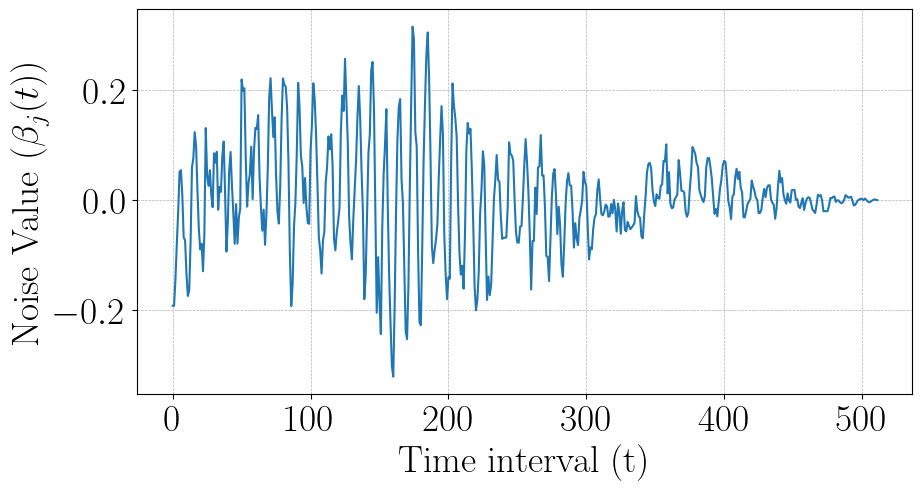

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(average_noise[: NUM_TIME_STEPS // 2])
plt.xlabel("Time interval (t)")
plt.ylabel(r"Noise Value ($\beta_{j}(t)$)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig(
    "./diagram_pictures/one_on_f_with_b_noise.png", dpi=dpi_level, bbox_inches="tight"
)

In [56]:
one_on_f_noise_gen = OneOnFNoiseWithBumpNoiseGenerator(
    total_num_examples=1,
    mu=0.0,
    threshold_freq=1000.0,
)

In [57]:
spectral_density = one_on_f_noise_gen.sqrt_scaled_spectral_density

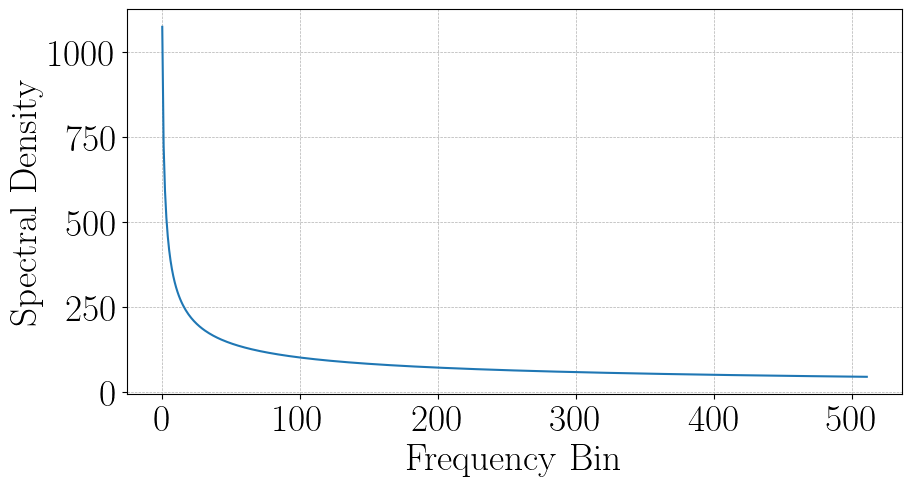

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(frequencies[: NUM_TIME_STEPS // 2], spectral_density)
plt.xlabel("Frequency Bin")
plt.ylabel("Spectral Density")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig("./diagram_pictures/one_on_f_noise_spectral_density.png", dpi=dpi_level, bbox_inches="tight")

In [59]:
average_noise = one_on_f_noise_gen.precomputed_noise[0, :, :].mean(dim=-1)

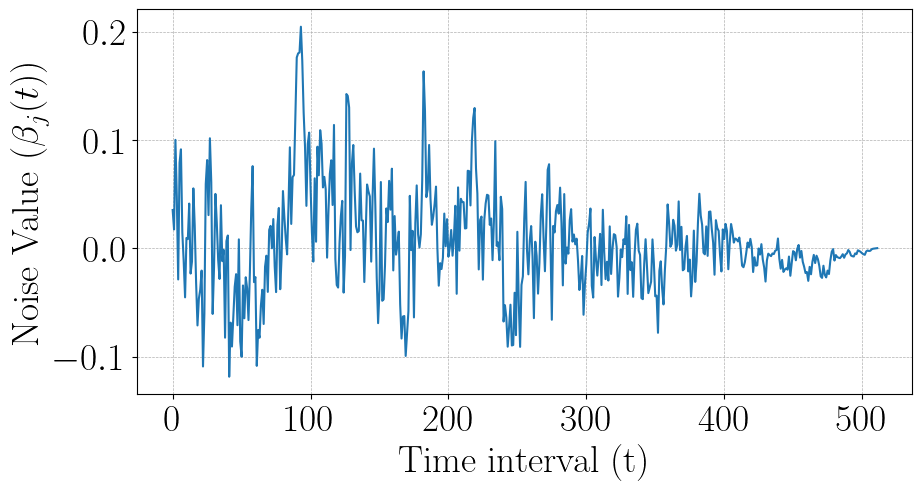

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(average_noise[: NUM_TIME_STEPS // 2])
plt.xlabel("Time interval (t)")
plt.ylabel(r"Noise Value ($\beta_{j}(t)$)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig("./diagram_pictures/one_on_f_noise.png", dpi=dpi_level, bbox_inches="tight")